In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

Download this file: https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc

This is the decadal average (1955-1964) temperature during January from the World Ocean Atlas available at: https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/

In [2]:
#!wget https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc

--2024-01-14 12:19:43--  https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.168, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 118230074 (113M) [application/x-netcdf]
Saving to: ‘woa18_decav_t01_01.nc.1’

woa18_decav_t01_01. 100%[===================>] 112.75M  1.49MB/s    in 99s     

2024-01-14 12:21:25 (1.14 MB/s) - ‘woa18_decav_t01_01.nc.1’ saved [118230074/118230074]



In [3]:
woaT = xr.open_dataset("./woa18_decav_t01_01.nc", decode_times=False)

In [4]:
woaT

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 57, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 1.45e+03 1.5e+03
  * time                (time) float32 372.5
Dimensions without coordinates: nbounds
Data variables: (12/13)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    ...                  ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_ma                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [136]:
woaT["t_an"].long_name

'Objectively analyzed mean fields for sea_water_temperature at standard depth levels.'

In [137]:
woaT["t_an"]

<xarray.DataArray 't_an' (time: 1, depth: 57, lat: 180, lon: 360)>
[3693600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
  * time     (time) float32 372.5
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

We see the variable "t_mn" has coordinates time, depth, latitude, and longitude. We can drop the time dimension because only one value exists along this dimension. We do this by using the "sel" or the "isel" function.

In [138]:
woaT["t_an"].sel(time = 372.5)

<xarray.DataArray 't_an' (depth: 57, lat: 180, lon: 360)>
[3693600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
    time     float32 372.5
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [139]:
woaT["t_an"].isel(time = 0) #select the first time 

<xarray.DataArray 't_an' (depth: 57, lat: 180, lon: 360)>
[3693600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
    time     float32 372.5
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [140]:
woaT["t_an"].isel(time=0).sel(lat = 13, lon=90, method="nearest")

<xarray.DataArray 't_an' (depth: 57)>
[57 values with dtype=float32]
Coordinates:
    lat      float32 13.5
    lon      float32 90.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
    time     float32 372.5
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [141]:
woaT["t_an"].isel(time=0).sel(lat = 13, lon=90, method="nearest").values

array([27.28371 , 27.24719 , 27.2295  , 27.27319 , 27.33261 , 27.3873  ,
       27.459791, 27.51421 , 27.5159  , 27.45649 , 27.39271 , 27.3178  ,
       27.14789 , 26.9158  , 26.682209, 26.3072  , 25.81201 , 25.2796  ,
       24.619791, 24.05571 , 23.54881 , 20.5813  , 18.19989 , 16.135609,
       14.471609, 13.4163  , 12.6327  , 12.0873  , 11.6903  , 11.393809,
       11.111609, 10.843491, 10.6148  , 10.41021 , 10.18379 , 10.01259 ,
        9.825009,  9.447809,  9.065591,  8.737809,  8.390909,  8.0946  ,
        7.81819 ,  7.47339 ,  7.21821 ,  6.93741 ,  6.64979 ,  6.4607  ,
        6.15791 ,  5.90539 ,  5.65271 ,  5.45791 ,  5.22579 ,  5.02861 ,
        4.84611 ,  4.63251 ,  4.3878  ], dtype=float32)

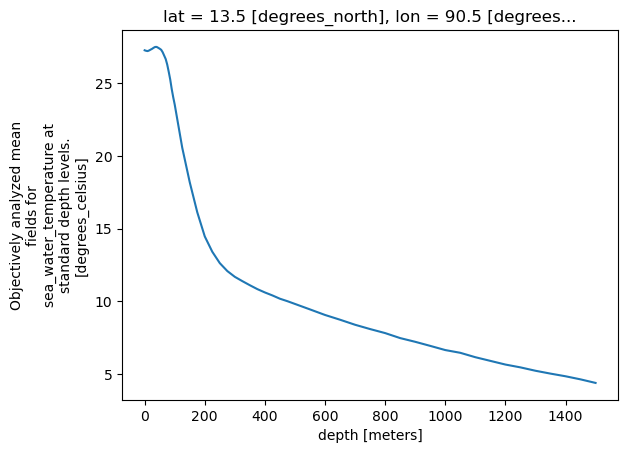

In [142]:
woaT["t_an"].isel(time=0).sel(lat = 13, lon=90, method="nearest").plot()

Text(0.5, 0, 'Temperature ($^\\circ$C)')

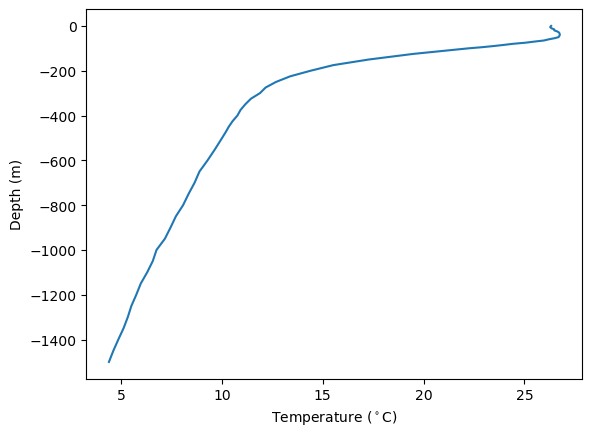

In [143]:
plt.plot(woaT["t_an"].isel(time=0).sel(lat = 13, lon=81, method="nearest"), -woaT.depth)
plt.ylabel("Depth (m)")
plt.xlabel("Temperature ($^\\circ$C)")

Text(0.5, 0, 'Temperature ($^\\circ$C)')

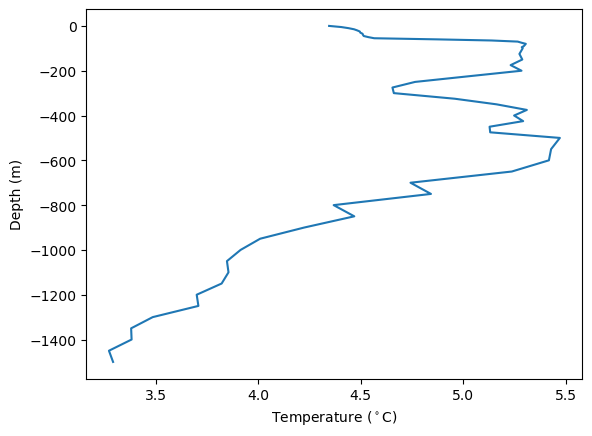

In [147]:
plt.plot(woaT["t_an"].isel(time=0).sel(lat = 65, lon=-30, method="nearest"), -woaT.depth)
plt.ylabel("Depth (m)")
plt.xlabel("Temperature ($^\\circ$C)")

Text(0.5, 0, 'Temperature ($^\\circ$C)')

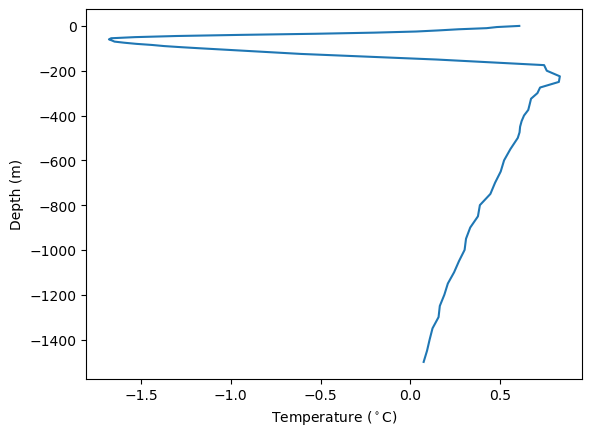

In [146]:
plt.plot(woaT["t_an"].isel(time=0).sel(lat = -65, lon=0, method="nearest"), -woaT.depth)
plt.ylabel("Depth (m)")
plt.xlabel("Temperature ($^\\circ$C)")

(-400.0, 5.0)

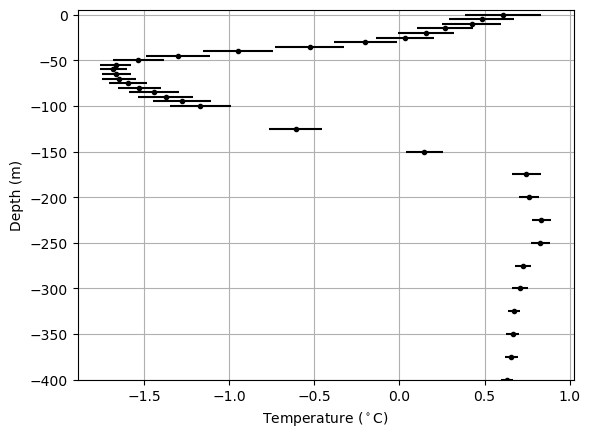

In [149]:
plt.errorbar(woaT["t_an"].isel(time=0).sel(lat = -65, lon=0, method="nearest"), -woaT.depth, 
             xerr = woaT["t_se"].isel(time=0).sel(lat = -65, lon=0, method="nearest"), linestyle=" ",
            marker=".", color="k")
plt.ylabel("Depth (m)")
plt.xlabel("Temperature ($^\\circ$C)")
plt.grid()

plt.ylim(-400, 5)

# Operations on the array: sum, mean, std, count etc.

In [150]:
woaT["t_an"].sel(lon = slice(80, 99), lat = slice(7, 25)).sel(depth=0).mean()

<xarray.DataArray 't_an' ()>
array(27.003479, dtype=float32)
Coordinates:
    depth    float32 0.0

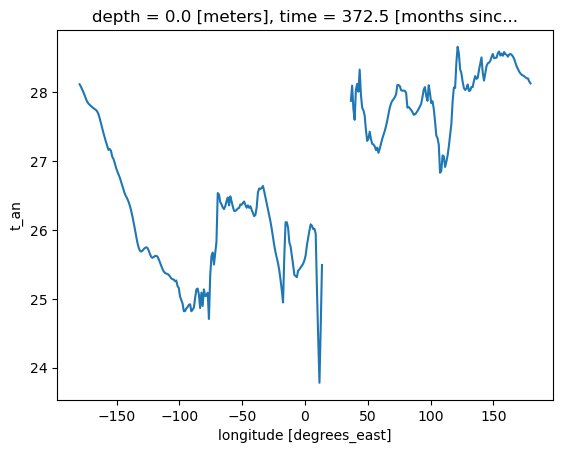

In [152]:
woaT["t_an"].isel(time=0).sel( lat = slice(-20, 20)).sel(depth=0).mean("lat").plot()

In [153]:
woaT["t_an"].sel(lon = slice(80, 99), lat = slice(7, 25)).sel(depth=0).std()

<xarray.DataArray 't_an' ()>
array(0.8433578, dtype=float32)
Coordinates:
    depth    float32 0.0

In [154]:
woaT["t_an"].sel(lon = slice(80, 99), lat = slice(7, 25)).sum()

<xarray.DataArray 't_an' ()>
array(161657.22, dtype=float32)

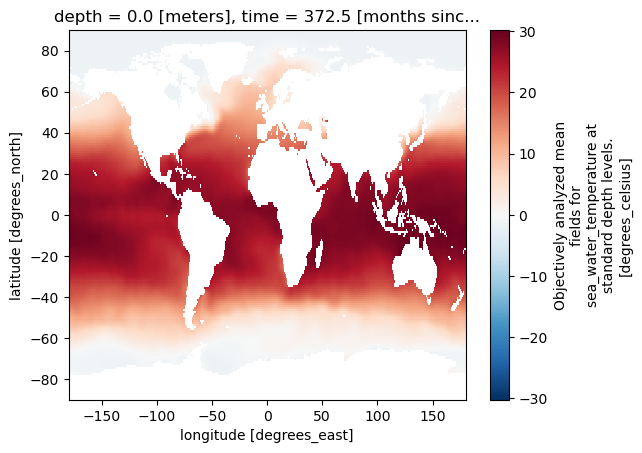

In [155]:
woaT.t_an.isel(time =0, depth=0).plot()

In [16]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

/Users/an1n23/anaconda3/envs/oceanpy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/an1n23/anaconda3/envs/oceanpy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


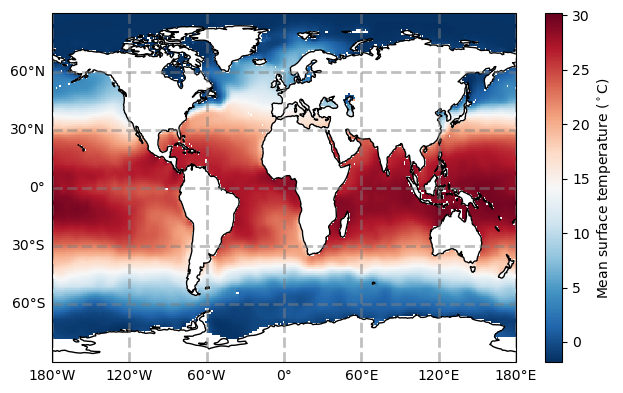

In [156]:
plt.figure(figsize = (190/25.4, 0.5*230/25.4))
mapax = plt.subplot(projection = ccrs.PlateCarree())

CF = mapax.pcolormesh(woaT.lon, woaT.lat, woaT.t_an.isel(time =0, depth=0), cmap="RdBu_r")

mapax.coastlines()
mapax.set_aspect("auto")


gl = mapax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar = plt.colorbar(CF, ax=mapax)
cbar.set_label("Mean surface temperature ($^\circ$C)")

In [157]:
woaT["t_an"].isel(time = 0).sel(lat = slice(0, 25), lon = slice(79, 99)).sel(depth = 300, method="nearest")

<xarray.DataArray 't_an' (lat: 25, lon: 20)>
[500 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 0.5 1.5 2.5 3.5 4.5 5.5 ... 20.5 21.5 22.5 23.5 24.5
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 94.5 95.5 96.5 97.5 98.5
    depth    float32 300.0
    time     float32 372.5
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

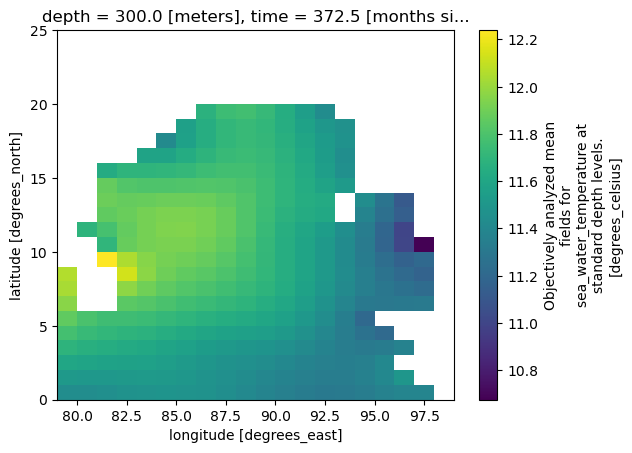

In [158]:
woaT["t_an"].isel(time = 0).sel(lat = slice(0, 25), lon = slice(79, 99)).sel(depth = 300, method="nearest").plot()

In [159]:
BayOfBengal_300m = woaT["t_an"].isel(time = 0).sel(lat = slice(0, 25), lon = slice(79, 99)).sel(depth = 300, method="nearest")

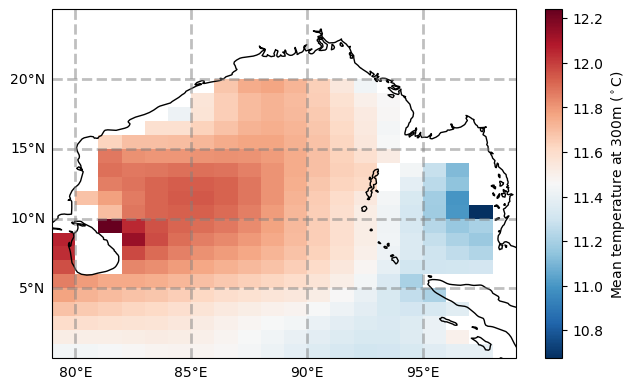

In [160]:
plt.figure(figsize = (190/25.4, 0.5*230/25.4))
mapax = plt.subplot(projection = ccrs.PlateCarree())

CF = mapax.pcolormesh(BayOfBengal_300m.lon, BayOfBengal_300m.lat, BayOfBengal_300m, cmap="RdBu_r")

mapax.coastlines()
mapax.set_aspect("auto")


gl = mapax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 5))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar = plt.colorbar(CF, ax=mapax)
cbar.set_label("Mean temperature at 300m ($^\circ$C)")

# Plot the temperature in the Southern Ocean, averaging between depths of 100 and 250 meters.

In [161]:
t_an = woaT["t_an"].isel(time = 0)

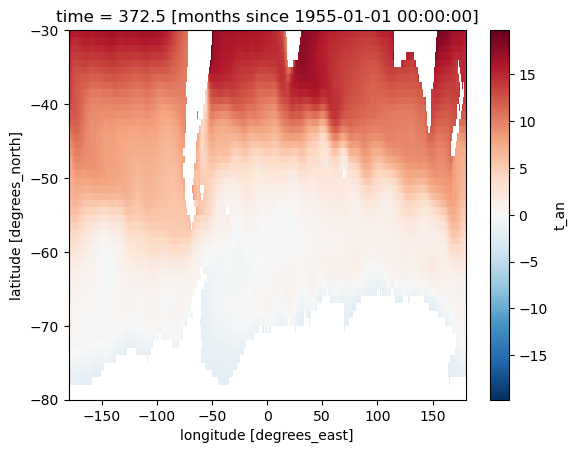

In [162]:
t_an.sel(lat = slice(-80, -30), depth = slice(100, 250)).mean("depth").plot()

# There's a problem with the approach above!
# Ideally, we need weighted averaging


Depth does not change with equal step size. $\Delta z$ is non-uniform, which means that if we average over values recorded in non-uniform depth cells, we are weighting more towards the smaller cells. What we need is a weighted average, with the weights being our depth cell size.

In [163]:
woaT.depth

<xarray.DataArray 'depth' (depth: 57)>
array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,   45.,
         50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,   90.,   95.,
        100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  325.,
        350.,  375.,  400.,  425.,  450.,  475.,  500.,  550.,  600.,  650.,
        700.,  750.,  800.,  850.,  900.,  950., 1000., 1050., 1100., 1150.,
       1200., 1250., 1300., 1350., 1400., 1450., 1500.], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
Attributes:
    standard_name:  depth
    bounds:         depth_bnds
    positive:       down
    units:          meters
    axis:           Z

In [164]:
np.diff(woaT.depth)

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50.], dtype=float32)

In [165]:
delta_z = np.diff(woaT.depth)
delta_z = np.append(delta_z, delta_z[-1])

In [166]:
z_l = woaT.depth.values + 0.5 * delta_z

In [167]:
z_l.shape

(57,)

In [168]:
delta_zl = np.diff(z_l)
delta_zl = np.append(delta_zl, delta_zl[-1])

In [169]:
delta_zl = xr.DataArray(data = delta_zl, coords = {"depth": woaT.depth})

In [170]:
delta_zl

<xarray.DataArray (depth: 57)>
array([ 5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,
        5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. , 15. , 25. , 25. ,
       25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
       25. , 25. , 37.5, 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. ], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03

In [171]:
woaT.depth*0 + delta_zl # another way to achieve what you get above.

<xarray.DataArray (depth: 57)>
array([ 5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,
        5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. ,  5. , 15. , 25. , 25. ,
       25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
       25. , 25. , 37.5, 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. ], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03

In [172]:
SO_tan = woaT["t_an"].isel(time = 0).sel(lat = slice(-80, -30), depth = slice(100, 250))

Now perform the weighted vertical averaging: 
$$\frac{1}{H}\int_{z1}^{z2} t dz$$

$H = |z1 - z2|$

The discretized form will be:

$$\frac{1}{H} \Sigma_{z1}^{z2} t \Delta z $$

In [173]:
(SO_tan * delta_zl.sel(depth = slice(100, 250))).sum("depth") / delta_zl.sel(depth = slice(100, 250)).sum("depth")

<xarray.DataArray (lat: 50, lon: 360)>
array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , -1.5412099, -1.5612386, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [14.863546 , 14.657884 , 14.48047  , ..., 15.3668165, 15.2395525,
        15.066452 ],
       [15.3357725, 15.183162 , 15.048868 , ..., 15.756784 , 15.633117 ,
        15.49229  ],
       [15.899013 , 15.793676 , 15.69808  , ..., 16.219341 , 16.111376 ,
        16.002802 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -79.5 -78.5 -77.5 -76.5 ... -33.5 -32.5 -31.5 -30.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 372.5

In [174]:
SO_weightedDepthAverage = (SO_tan * delta_zl.sel(depth = slice(100, 250))).sum("depth") / delta_zl.sel(depth = slice(100, 250)).sum("depth")

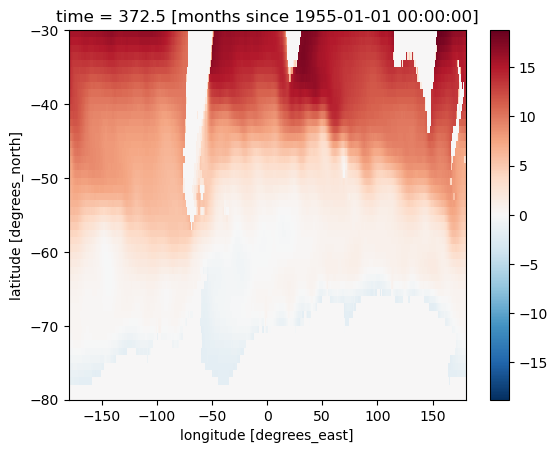

In [175]:
SO_weightedDepthAverage.plot()

# How to avoid doing these operations manually? Use Xgcm

In [37]:
#!pip install xgcm

In [176]:
from xgcm import Grid

In [177]:
t_an

<xarray.DataArray 't_an' (depth: 57, lat: 180, lon: 360)>
[3693600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
    time     float32 372.5
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

## Let's begin by creating half stepped coords along lat and lon just like we did with depth

Recall how we created the half stepped depth coordinate

![Source: MITgcm documentation](https://xgcm.readthedocs.io/en/latest/_images/grid2d_hv.svg)

Image Source: Xgcm documentation

Diff operator: $\delta_i \phi = \phi_{i+1/2} - \phi_{i - 1/2}$

Interpolation operator: $\bar{\phi} = (\phi_{i+1/2} + \phi_{i-1/2}) \times 0.5$

In [178]:
delta_z = np.diff(woaT.depth)
delta_z = np.append(delta_z, delta_z[-1])

In [179]:
z_l = woaT.depth.values + 0.5 * delta_z

In [180]:
delta_zl = np.diff(z_l)
delta_zl = np.append(delta_zl, delta_zl[-1])

In [181]:
delta_zl = xr.DataArray(data = delta_zl, coords = {"depth": woaT.depth})

In [182]:
delta_lat = np.diff(woaT.lat)
delta_lat = np.append(delta_lat, delta_lat[-1])

In [183]:
lat_S = woaT.lat.values - 0.5 * delta_lat # latitude displaced to the South by half of delta(lat)

In [184]:
Re = 6370e3 # radius of earth

In [185]:
dyc = Re * np.deg2rad(delta_lat) # delta(lat) converted to distance in meters 

In [186]:
delta_lon = np.diff(woaT.lon)
delta_lon = np.append(delta_lon, delta_lon[-1])

In [187]:
lon_W = woaT.lon.values - 0.5 * delta_lon # longitude displaced to the West by half delta(lon)

In [188]:
dxc = np.zeros((woaT.lat.shape[-1], woaT.lon.shape[-1]))
for i in range(len(woaT.lat.values)):
    dxc[i] = Re * np.cos( np.deg2rad(woaT.lat.values[i]) ) * np.deg2rad(delta_lon)

In [189]:
dxc # delta(lon) converted to distance in meters

array([[ 970.19702148,  970.19702148,  970.19702148, ...,  970.19702148,
         970.19702148,  970.19702148],
       [2910.29199219, 2910.29199219, 2910.29199219, ..., 2910.29199219,
        2910.29199219, 2910.29199219],
       [4849.50048828, 4849.50048828, 4849.50048828, ..., 4849.50048828,
        4849.50048828, 4849.50048828],
       ...,
       [4849.50048828, 4849.50048828, 4849.50048828, ..., 4849.50048828,
        4849.50048828, 4849.50048828],
       [2910.29199219, 2910.29199219, 2910.29199219, ..., 2910.29199219,
        2910.29199219, 2910.29199219],
       [ 970.19702148,  970.19702148,  970.19702148, ...,  970.19702148,
         970.19702148,  970.19702148]])

In [190]:
t_an.shape

(57, 180, 360)

In [191]:
tmean = xr.Dataset({"t_an" : (["z_c", "lat_c", "lon_c"], t_an.values),
            },
          coords = {"z_c":(["z_c"], woaT.depth.values, {"axis":"Z"}),
                    "z_l": (["z_l"], z_l, {"axis":"Z", "c_grid_axis_shift":-0.5}),
                    
                    "lat_c": (["lat_c"], woaT.lat.values, {"axis":"Y", "c_grid_axis_shift":None}),
                    "lat_S": (["lat_S"], lat_S, {"axis":"Y", "c_grid_axis_shift":-0.5}),
                    
                    "lon_c": (["lon_c"], woaT.lon.values, {"axis":"X", "c_grid_axis_shift":None}),
                    "lon_W": (["lon_W"], lon_W, {"axis":"X", "c_grid_axis_shift":-0.5}),
                    
                    "dx_c2c" : (["lat_c", "lon_W"], dxc),
                    "dy_c2c" : (["lat_S"], dyc),
                    
                    "dz_c2c" : (["z_c"], delta_zl.values),
                    "dz_l2l" : (["z_l"], delta_z)
                   } )

In [192]:
tgrid = Grid(tmean)

In [193]:
tmean["dx_W2W"] = tgrid.interp(tmean["dx_c2c"], "X")

In [194]:
tmean["dy_S2S"] = tgrid.interp(tmean["dy_c2c"], "Y")

In [195]:
tmean = tmean.set_coords(["dx_W2W", "dy_S2S"])

In [196]:
tgrid = Grid(tmean, periodic=["X"],
              metrics={ ("X",):["dx_c2c", "dx_W2W"],
              ("Y",):["dy_c2c", "dy_S2S"],
              ("Z",):["dz_c2c", "dz_l2l"]
             })

In [197]:
tgrid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   lat_c --> left
  * left     lat_S --> center
X Axis (periodic, boundary=None):
  * center   lon_c --> left
  * left     lon_W --> center
Z Axis (not periodic, boundary=None):
  * center   z_c --> left
  * left     z_l --> center

In [198]:
tmean["t_an"]

<xarray.DataArray 't_an' (z_c: 57, lat_c: 180, lon_c: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.56271   , -1.5635101 , -1.5644    , ..., -1.56151   ,
         -1.56161   , -1.56201   ],
        [-1.56411   , -1.56461   , -1.5650101 , ..., -1.5628101 ,
         -1.56301   , -1.5635101 ],
        [-1.58771   , -1.58771   , -1.58771   , ..., -1.58771   ,
         -1.58771   , -1.58771   ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.41231   , -0.41151002, -0.41061002, ..., -0.41511002,
         -0.41401002, -0.41311002],
        [-0.43601   , -0.43571   , -0.43531   , ..., -0.43661   ,
         -0.43631002, -0.43611002],
        [-0.45621002, -0.45621002, -0.45621002, ..., -0.45621002,
         -0.45621002, -0.45621002]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.47131002, -0.47021002, -0.46901003, ..., -0.47391   ,
         -0.4731    , -0.47221002],
        [-0.49121   , -0.49081   , -0.49021003, ..., -0.49221   ,
         -0.49191   , -0.49161002],
        [-0.50871   , -0.50871   , -0.50871   , ..., -0.50871   ,
         -0.50871   , -0.50871   ]]], dtype=float32)
Coordinates:
  * z_c      (z_c) float32 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat_c    (lat_c) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon_c    (lon_c) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    dz_c2c   (z_c) float32 5.0 5.0 5.0 5.0 5.0 5.0 ... 50.0 50.0 50.0 50.0 50.0
    dx_W2W   (lat_c, lon_c) float64 970.2 970.2 970.2 ... 970.2 970.2 970.2
    dy_S2S   (lat_c) float32 1.112e+05 1.112e+05 ... 1.112e+05 1.112e+05

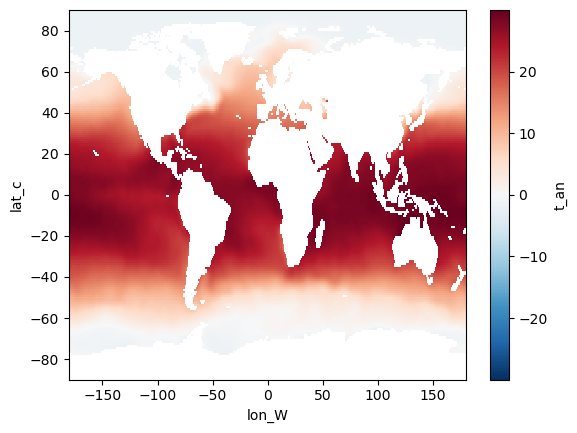

In [199]:
tgrid.interp(tmean["t_an"].isel(z_c=0), "X").plot()

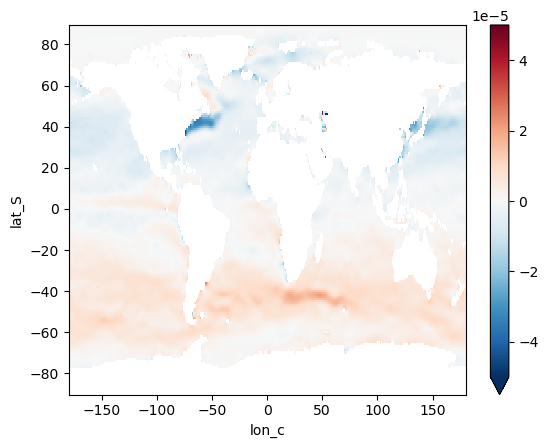

In [203]:
tgrid.derivative(tmean["t_an"].isel(z_c=0), "Y").plot(vmin=-5e-5, vmax=5e-5, cmap="RdBu_r")

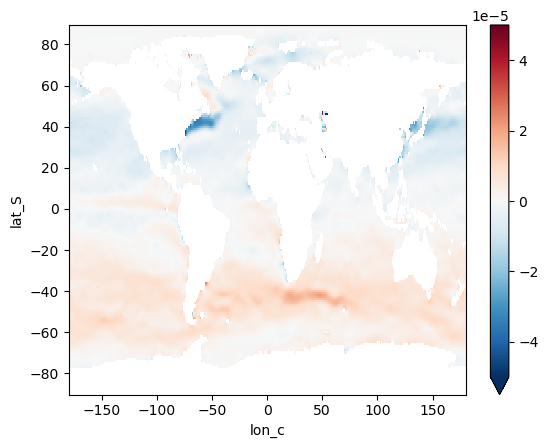

In [205]:
# the same can be achieved with the diff operator
(tgrid.diff(tmean["t_an"].isel(z_c=0), "Y") / tmean["dy_c2c"]).plot(vmin=-5e-5, vmax=5e-5, cmap="RdBu_r")

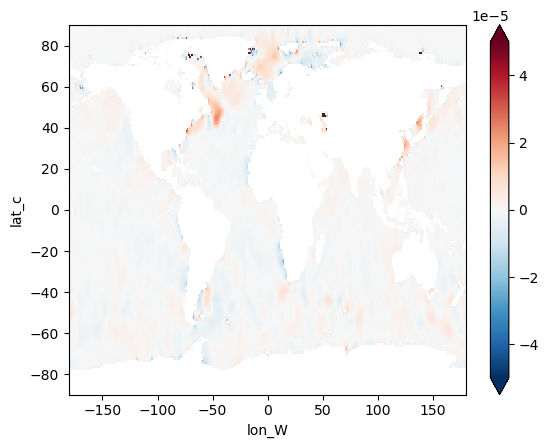

In [207]:
tgrid.derivative(tmean["t_an"].isel(z_c=0), "X").plot(vmin=-5e-5, vmax=5e-5, cmap="RdBu_r")

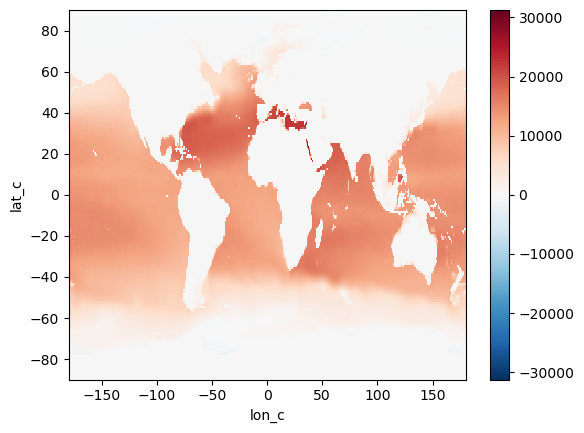

In [215]:
tgrid.integrate(tmean["t_an"], "Z").plot()

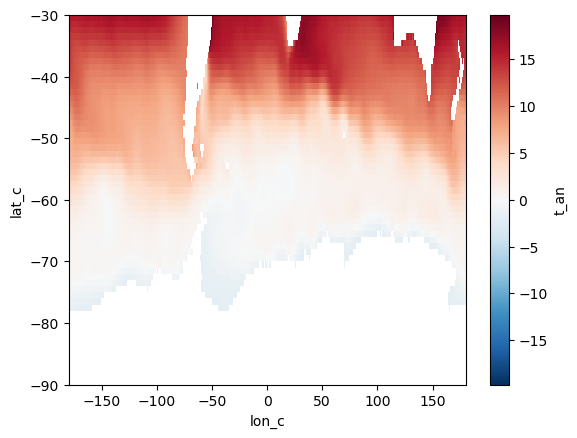

In [216]:
tgrid.average(tmean["t_an"].sel(lat_c=slice(-90, -30), z_c=slice(100,250)), "Z").plot()

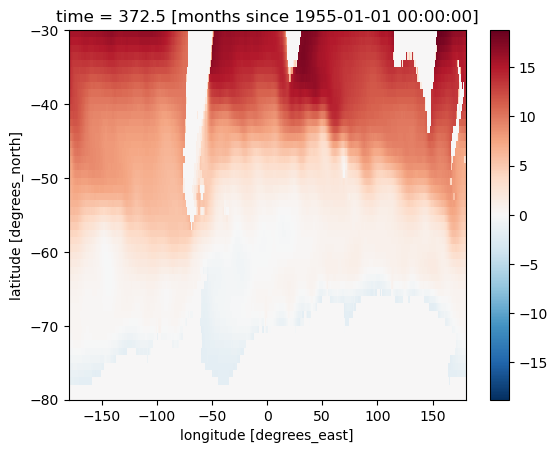

In [217]:
SO_weightedDepthAverage.plot()

# Compute heat content of the Southern Ocean in the upper 700m water column

Compute the heat content using the following:

$\textrm{OHC} = \rho C_p \int\int\int \theta\, dx dy dz$



In [85]:
rho = 1035 # kg/m3
Cp = 4e3 # J/(kg k)

# Compute the average SST in the West Pacific, compare with the East Pacific

# Bonus assignments

1. Download the data for the rest of the year. (The file we were using was the average in January).
2. Download the decadal averages from subsequent decades.
3. Plot the seasonal SST for the Bay of Bengal and show how this varies across decades.
4. Is there a trend?
5. Plot the trend in SST as a global map.
6. Which region has the strongest trend?